<a href="https://colab.research.google.com/github/prateekshetty696/HandGesture/blob/main/Hand_gesture_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data
data_test=pd.read_csv("https://raw.githubusercontent.com/VinitaSilaparasetty/hand-gesture-recognition/main/sign_mnist_test.csv")
data_train=pd.read_csv("/content/drive/MyDrive/Hand Gesture/sign_mnist_test.csv")

In [ ]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
def show_img(img, df):
  label = data_test['label'][img]
  pixels = data_test.iloc[img, 1:]
  pixels = np.array (pixels, dtype='uint8')
  pixels = pixels.reshape((28,28))
  plt.title('Label is{label}'.format(label=label))
  plt.imshow (pixels, cmap='gray')
  plt.show()



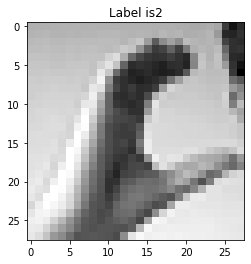

In [ ]:
show_img (20,data_test)

In [ ]:
data_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.00000,7172.000000,7172.000000,7172.000000,7172.00000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,167.311350,168.670106,169.535555,170.325851,170.983408,171.912995,172.547546,173.024679,173.047407,173.061071,172.892917,172.721138,172.757808,172.464724,171.486336,170.335053,167.807864,166.130508,166.005298,149.299219,152.244562,155.137758,157.410904,159.926380,162.644032,163.941578,165.429030,167.522030,169.134551,170.018265,...,130.122142,131.117122,137.610569,144.693391,152.420524,158.126185,162.592443,164.434049,163.607501,162.289320,160.726018,158.914250,140.333519,141.578221,144.378555,146.717234,148.785694,149.922058,150.090073,150.996096,149.320413,144.85527,143.642917,139.861266,134.860987,132.53932,130.001115,127.021194,127.619074,130.056191,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,32.361682,30.908526,29.798987,29.443487,29.428899,28.187431,27.153368,26.655256,26.241347,26.175239,26.432681,26.472974,25.966731,25.864503,26.901053,27.857983,32.352186,35.222495,34.997471,43.778760,42.125128,40.656730,39.562860,37.761727,36.259743,36.512048,36.118684,34.011801,32.365020,31.275976,...,54.654038,60.071544,62.733051,64.028074,64.554236,64.492854,63.649858,63.092645,63.650868,63.577437,64.835263,65.976015,56.224514,55.376292,55.941713,54.230365,55.368538,54.532359,55.625739,56.806818,55.737844,55.58762,55.700026,54.368151,53.685764,52.43773,54.613953,56.146581,58.540949,61.338999,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,30.000000,35.000000,4.000000,0.000000,2.000000,25.000000,26.000000,32.000000,37.000000,7.000000,0.000000,16.000000,36.000000,35.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,9.000000,13.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
y_train=data_train['label']
y_test=data_test['label']
del data_train['label']
del data_test['label']

In [ ]:
label_binarizer=LabelBinarizer()

y_train=label_binarizer.fit_transform (y_train)

y_test=label_binarizer.fit_transform (y_test)

In [ ]:
x_train = data_train.values
x_test = data_test.values

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

#Data Augmentation

In [ ]:
data_generator = ImageDataGenerator(featurewise_center=False,
                                    samplewise_center=False, 
                                    featurewise_std_normalization=False, 
                                    samplewise_std_normalization=False, 
                                    zca_whitening=False,
                                    rotation_range=10, 
                                    zoom_range = 0.1,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1, 
                                    horizontal_flip=False, 
                                    vertical_flip=False
)

data_generator.fit(x_train)


#Building a model


In [ ]:

model = Sequential()
model.add (Conv2D (75, (3,3), strides= 1, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add (Conv2D (50, (3,3), strides= 1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add (Conv2D (25, (3,3), strides= 1, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add (Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=24,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:
model.fit (data_generator.flow(x_train,y_train,batch_size=128), epochs=20, validation_data=(x_test,y_test), callbacks=[learning_rate_reduction])

Epoch 1/20
57/57 [==============================] - 55s 635ms/step - loss: 2.5650 - accuracy: 0.2812 - val_loss: 3.3148 - val_accuracy: 0.0531
Epoch 2/20
57/57 [==============================] - 35s 611ms/step - loss: 0.9113 - accuracy: 0.7102 - val_loss: 3.5229 - val_accuracy: 0.0346
Epoch 3/20
57/57 [==============================] - 35s 621ms/step - loss: 0.5750 - accuracy: 0.8074 - val_loss: 4.2648 - val_accuracy: 0.0923
Epoch 4/20
57/57 [==============================] - 35s 606ms/step - loss: 0.3007 - accuracy: 0.8991 - val_loss: 4.6063 - val_accuracy: 0.0692
Epoch 5/20
57/57 [==============================] - 35s 609ms/step - loss: 0.1774 - accuracy: 0.9413 - val_loss: 3.8904 - val_accuracy: 0.1124
Epoch 6/20
57/57 [==============================] - 35s 609ms/step - loss: 0.1293 - accuracy: 0.9607 - val_loss: 3.0008 - val_accuracy: 0.1893
Epoch 7/20
57/57 [==============================] - 35s 609ms/step - loss: 0.1749 - accuracy: 0.9487 - val_loss: 2.2762 - val_accuracy: 0.3572

In [ ]:
model.evaluate(x_test,y_test)

225/225 [==============================] - 6s 26ms/step - loss: 0.0012 - accuracy: 1.0000


[0.0012460029684007168, 1.0]

In [ ]:
predictions = model.predict_classes(x_test)
for i in range(len(predictions)):
  if (predictions[i]>=9 or predictions[i]>=25):
    predictions[i]+=1
predictions[:5] 

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([ 6,  5, 10,  0,  3])

In [ ]:
model.save('/content/drive/MyDrive/Hand Gesture/hand_gesture.h5')

In [ ]:
!curl -LkO https://raw.githubusercontent.com/remoteit/installer/master/scripts/auto-install.sh
! chmod +x ./auto-install.sh
! sudo ./auto-install.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11536  100 11536    0     0  97762      0 --:--:-- --:--:-- --:--:-- 97762

 curl found 
********************************************************
remote.it platform and binary tester version 2.6.39 
Current directory /content
Sat Jul 10 19:09:51 UTC 2021
********************************************************
Linux 55c39f39b650 5.4.104+ #1 SMP Sat Jun 5 09:50:34 PDT 2021 x86_64 x86_64 x86_64 GNU/Linux
Detected architecture is x86_64
/usr/bin/dpkg
Debian OS detected.
amd64 architecture detected.

connectd.x86_64-ubuntu16.04 already in current directory, testing now...
Looks compatible.
connectd.x86_64-ubuntu16.04 is compatible!
filename connectd_2.6.39_amd64.deb
filepath https://github.com/remoteit/installer/releases/download/v2.6.39/connectd_2.6.39_amd64.deb
(Reading database ... 160853 files and directories currently install

In [ ]:
! sudo connectd_installer


/usr/bin/connectd_installer: 67: /usr/bin/connectd_options: ip: not found

remote.it connection installer Version: 2.6.39 lib_v2.6.29 
Modified: June 10, 2020 (library) April 24, 2021 
Build date: Fri Apr 30 15:44:51 UTC 2021
curl with SSL support installed.

Checking the daemon for compatibility... 

Using architecture x86_64-ubuntu16.04...

Checking your network for compatibility... 

Network connection OK...
Your network is compatible with remote.it services.

********************* Sign In Menu *********************
                                                      
     1) Sign in to your remote.it account with username and password   
     2) Sign in to your remote.it account with access key and secret   
     3) Exit                                          
                                                      
********************************************************
*  To create a remote.it account, please visit         *
*  https://remote.it                                

In [ ]:
!pip install numpy

In [ ]:
!pip install streamlit

     |████████████████████████████████| 788kB 5.2MB/s 
     |████████████████████████████████| 368kB 15.4MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 6.0.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.25.0 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


In [1]:
%%writefile app.py

import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau


st.markdown("<h1 style='text-align: center;'>Hand Gesture Recognition </h1>", unsafe_allow_html=True)

st.markdown("<h3 style='text-align: center;'>Built with TensorFlow2 & Keras </h4>",unsafe_allow_html=True)

st.text('2. Results of your selection:')

gesture = pd.read_csv('/content/drive/MyDrive/Hand Gesture/sign_mnist_test.csv')

st.sidebar.title('1. Choose a gesture:')

a=st.sidebar.number_input(label='Enter a value upto 255:',min_value=0,value=0,step=1)

    
    # Take the label
label = gesture['label'][a]
    
    # Take the pixels
pixels = gesture.iloc[a, 1:]

    # The pixel intensity values are integers from 0 to 255
pixels = np.array(pixels, dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))
    
    

    # Plot
st.sidebar.text('Label is {label}'.format(label=label))
st.sidebar.image(pixels)




#extract labels

y_test=gesture['label']
del gesture['label']


#Label Binarizer

label_binarizer=LabelBinarizer()

y_test=label_binarizer.fit_transform(y_test)

x_test=gesture.values

#normalization

x_test=x_test/255


#reshape

x_test=x_test.reshape(-1,28,28,1)


st.cache(allow_output_mutation=True)
model = tf.keras.models.load_model('/content/drive/MyDrive/Hand Gesture/hand_gesture.h5')
predictions=model.predict_classes(x_test)
  

st.success('Done!')

#st.image(predictions[a].astype('uint8'),clamp=True)
st.text('The alphabet is {}'.format(chr(ord('`')+label)))

Writing app.py


In [ ]:
!streamlit config show

# Below are all the sections and options you can have in ~/.streamlit/config.toml.

[global]

# By default, Streamlit checks if the Python watchdog module is available and, if not, prints a warning asking for you to install it. The watchdog module is not required, but highly recommended. It improves Streamlit's ability to detect changes to files in your filesystem.
# If you'd like to turn off this warning, set this to True.
# Default: false
disableWatchdogWarning = false

# If True, will show a warning when you run a Streamlit-enabled script via "python my_script.py".
# Default: true
showWarningOnDirectExecution = true


[logger]

# Level of logging: 'error', 'warning', 'info', or 'debug'.
# Default: 'info'
level = "info"

# String format for logging messages. If logger.datetimeFormat is set, logger messages will default to `%(asctime)s.%(msecs)03d %(message)s`. See [Python's documentation](https://docs.python.org/2.6/library/logging.html#formatter-objects) for available attributes.
# 

In [ ]:
!streamlit run --server.port 80 app.py --&>/dev/null&